# Sleep Efficiency Dataset

# Introduction

Sleep is a vital part of life. If you were told you could choose the amount of hours you sleep throughout
a night to the second, you would jump at that opportunity right? Because let's be real, there are so many
factors that affect our sleep, whether it be a quiet drink, the varying cups of coffee that get you through
that long day or amount of times you have to walk around the office to escape that stressful day. It's so 
rare we get to sleep through a night so efficiently. 

We have a dataset where recordings have been taken from 400+ individuals, both male and female which includes
smokers, drinkers, etc. These people recorded their sleep duration (in hours) and other factors such as the
amount of drinks had, whether they were a smoker, how many times they exercised and many more were also recorded.
The ultimate goal of this recording was to produce a total sleep efficiency rating. The sleep efficiency rating 
took the total time of sleep and compared to how many times the individual woke up, the deepness or lightness of
their sleep and thus produced an overall score.

Now whilst we ideally want that perfect sleep, we also want balance. So for this report I will be analysing the 
sleep data in depth, identifying potential patterns and trying to reach several conclusions, with the main goal
in mind being able to potentially predict the sleep efficiency rating, including the duration of sleep through 
the amount of activity done in a day, specifically focusing on how much exercise in a day it takes to get an 
effective sleep. Other factors will be analysed as well as we explore the relationship between exercise and 
sleep.

# Initialisation

In [2]:
# First import the 2 most important libraries for datasets, arrays, etc.
import pandas as pd
import numpy as np

In [3]:
# Read the dataset as a dataframe
df = pd.read_csv("Sleep_Efficiency.csv")

In [4]:
# We'll check the shape of the dataset, checking all columns were imported
print("The dimesions of the dataset are: ", df.shape)

The dimesions of the dataset are:  (452, 15)


In [5]:
# check the dataset for any missing values to check its validity
miss_values = df.isnull().sum()
print(miss_values)

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [6]:
# Since we have some missing values, we'll fill them with 0 (null)
# It may lead to slight inaccuracies but in most cases an empty value means a person who was studied left it blank on purpose
df.fillna(0, inplace = True)

In [7]:
# check the dataset for any missing values to check its validity to ensure the above worked
miss_values = df.isnull().sum()
print(miss_values)

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


In [8]:
# check the data types of each of the columns for clarity purposes
print(df.dtypes)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


# Analysis

Firstly we'll create two subsets, one where the exercise frequency is equal to zero 
(indicating no exercise performed for the day) and another where exercise frequency 
is greater than zero (indicating more than zero exercise in a day). From these 
we'll analyse the averages of sleep duration and sleep efficiency to determine if
there's any obvious flucuation between the two.

In [9]:
# create a subset of the dataframe for exercise frequency greater than 0
df_exercise = df[df['Exercise frequency'] > 0]

In [10]:
# print to make sure it worked
print(df_exercise.head(5))

   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0          

In [11]:
# create a second subset where exercise frequency is equal to 0, indicating no exercise
df_no_exercise = df[df['Exercise frequency'] == 0]

In [12]:
# print to make sure it worked
print(df_no_exercise.head(5))

    ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
9   10   11  Female  2021-09-16 01:00:00  2021-09-16 10:00:00             9.0   
14  15   36  Female  2021-07-03 01:30:00  2021-07-03 10:00:00             8.5   
16  17   21  Female  2021-03-24 01:00:00  2021-03-24 08:00:00             7.0   
18  19   43  Female  2021-07-27 00:00:00  2021-07-27 09:00:00             9.0   
31  32   18    Male  2021-05-24 00:30:00  2021-05-24 08:30:00             8.0   

    Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
9               0.55                    18                     37   
14              0.54                    20                     32   
16              0.54                    28                     22   
18              0.98                    20                     67   
31              0.68                    22                     30   

    Light sleep percentage  Awakenings  Caffeine consumption  \
9                       45        

In [13]:
# use in-built describe() function to display key data summaries
stat_summary_ex = df_exercise.describe()
stat_summary_no_ex = df_no_exercise.describe()

In [14]:
print(np.round(stat_summary_ex['Sleep duration'], 2))

count    330.00
mean       7.41
std        0.83
min        5.00
25%        7.00
50%        7.50
75%        8.00
max       10.00
Name: Sleep duration, dtype: float64


In [15]:
print(np.round(stat_summary_no_ex['Sleep duration'], 2)) #round to 2dp for neatness

count    122.00
mean       7.61
std        0.94
min        5.00
25%        7.00
50%        7.50
75%        8.00
max       10.00
Name: Sleep duration, dtype: float64


From the above summary, we can determine a couple of things. Firstly, the average sleep (in hours) 
when someone exercises at least once per day is approximately 7.41 hours. The average sleep (in hours) 
when someone does not exercise at least once per day is approximately 7.61 hours. The measures of 
spread such as median, Q1 and Q3 are all equal. So how does this make sense? Well there could be a 
number of factors, including outliers that skew the results in a significant way. What this data
summary basically tells us is that sleep duration is a consistent data entry and is not dependent on
how much exercise is done throughout the day so we should be focusing more on sleep efficiency, which 
takes into account more factors than just sleep duration. Just to prove ourselves correct, we'll 
observe any outliers in the data below and visualise it using box plots.

In [16]:
# since we want to summarise the data, import the stats library
from scipy import stats

In [17]:
# since we know only integer data types can produce a z-score, select from the table the appropriate data
z_scores_ex = stats.zscore(df_exercise['Sleep duration'])
z_scores_no_ex = stats.zscore(df_no_exercise['Sleep duration'])

abs_z_scoresA = abs(z_scores_ex)
abs_z_scoresB = abs(z_scores_no_ex)

outliers_ex = (abs_z_scoresA > 3).sum()
outliers_no_ex = (abs_z_scoresB > 3).sum()

print("The number of outliers for exercised based sleep are: ")
print(outliers_ex)
print('')
print("The number of outliers for non-exercised based sleep are: ")
print(outliers_no_ex)

The number of outliers for exercised based sleep are: 
6

The number of outliers for non-exercised based sleep are: 
0


In [18]:
# to summarise import the appropriate libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Exercise based Sleep Duration')

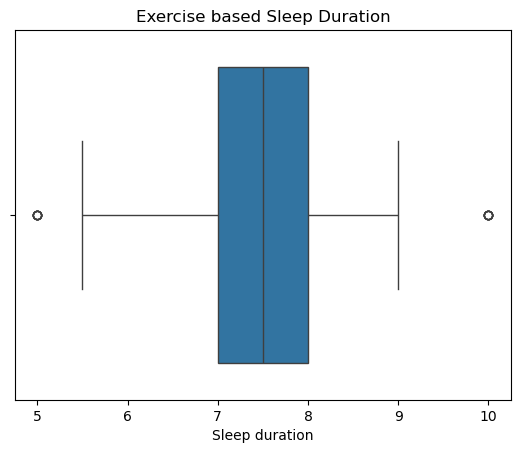

In [19]:
sns.boxplot(x = df_exercise['Sleep duration'], data = df_exercise)
plt.title("Exercise based Sleep Duration")

Text(0.5, 1.0, 'Non-Exercise based Sleep Efficiency')

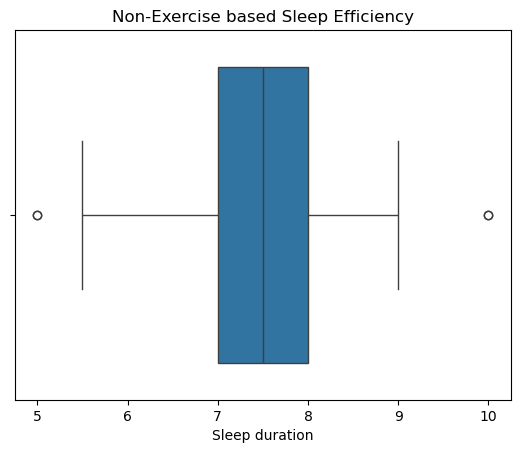

In [20]:
sns.boxplot(x = df_no_exercise['Sleep duration'], data = df_no_exercise)
plt.title("Non-Exercise based Sleep Efficiency")

So above we see no real correlation and a very consistent even spread in data entries for
sleep duration for both non exercise and exercise. We'll analyse 'Sleep efficiency' as we've
done above to 'Sleep duration' to see if there's any difference.

In [21]:
print(np.round(stat_summary_ex['Sleep efficiency'], 2))

count    330.00
mean       0.81
std        0.13
min        0.50
25%        0.72
50%        0.85
75%        0.91
max        0.99
Name: Sleep efficiency, dtype: float64


In [22]:
print(np.round(stat_summary_no_ex['Sleep efficiency'], 2))

count    122.00
mean       0.75
std        0.14
min        0.50
25%        0.64
50%        0.76
75%        0.86
max        0.98
Name: Sleep efficiency, dtype: float64


Text(0.5, 1.0, 'Exercise based Sleep Efficiency')

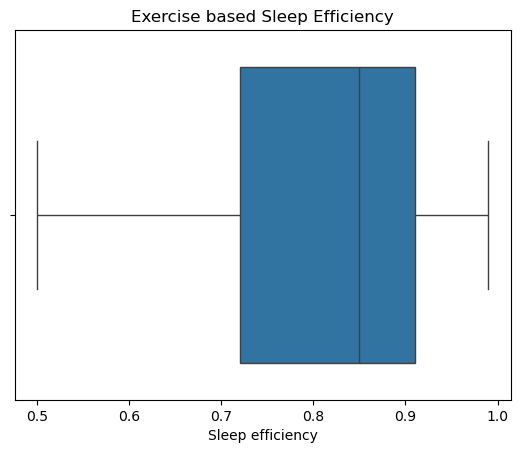

In [23]:
sns.boxplot(x = df_exercise['Sleep efficiency'], data = df_exercise)
plt.title("Exercise based Sleep Efficiency")

Text(0.5, 1.0, 'Non-Exercise based Sleep Efficiency')

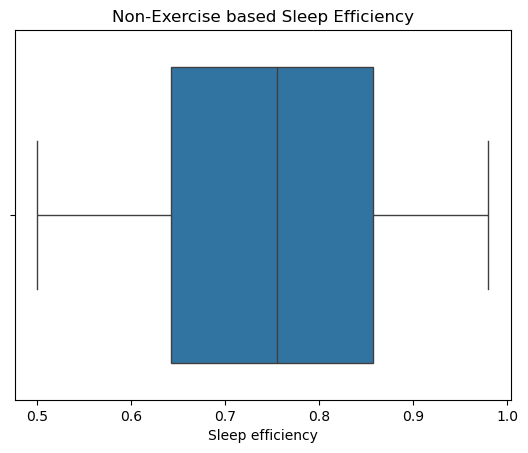

In [24]:
sns.boxplot(x = df_no_exercise['Sleep efficiency'], data = df_no_exercise)
plt.title("Non-Exercise based Sleep Efficiency")

From the above results, we can see a major difference in the data. Firstly, the mean and
medians are higher for sleep efficiency for exercise than sleep efficiency for non exercise.
Visually from the box plots, we see that sleep efficiency with exercise is positively skewed,
meaning the spread of the data entries are more higher figures than lower figures, where as
the box plot for non-exercise based sleep efficiency is a more centred spread, meaning the 
entries are not weighted in either direction. From this basic analysis we can safely assume that
sleep efficiency is significantly greater when an individual exercises through the day. This means
they wake up less and have a higher percentage of deep sleep as opposed to those who do not exercise
throughout the day. 

# Correlation

We'll look at the correlation between variables in the column. We want to look at the
strength of the relationships between these variables as we're trying to determine the 
best way to achieve the highest possible sleep efficiency through exercise. We also want
to prove that there is a stronger correlation between sleep efficiency and exercise than
any other category. 

In [25]:
alc_sleep_corr = df['Sleep efficiency'].corr(df['Alcohol consumption'])
print("Pearson's Correlation for Sleep Efficiency and Alcohol Consumption: ", alc_sleep_corr)

Pearson's Correlation for Sleep Efficiency and Alcohol Consumption:  -0.3812487349619098


In [26]:
caff_sleep_corr = df['Sleep efficiency'].corr(df['Caffeine consumption'])
print("Pearson's Correlation for Sleep Efficiency and Caffeine Consumption: ", caff_sleep_corr)

Pearson's Correlation for Sleep Efficiency and Caffeine Consumption:  0.06574977724171494


In [27]:
ex_sleep_corr = df['Sleep efficiency'].corr(df['Exercise frequency'])
print("Pearson's Correlation for Sleep Efficiency and Exercise Frequency: ", ex_sleep_corr)

Pearson's Correlation for Sleep Efficiency and Exercise Frequency:  0.2574361256865937


From the above, we can see that the relationship between sleep efficiency and exercise has
yielded the strongest correlation. The correlation between sleep efficiency and alcohol consumption
is significantly weak and the correlation between sleep efficiency and caffeine consumption 
is neither strong or weak. In saying this, the correlation between sleep efficiency and 
exercise isn't strong, but its at least positive and stronger than the previously mentioned, 
meaning there's some relationship there albiet not a strong one. From this we're going to 
train a Linear Regression model to be able to predict outcomes based on this relationship. 

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # for Linear Regression
from sklearn.metrics import mean_squared_error # To calc MSE and RMSE
from sklearn.metrics import r2_score # To calc to R^2 score
from sklearn.metrics import mean_absolute_error # To calc the MAE

In [29]:
exercise_freq = df[['Exercise frequency']]
sleep_outcome = df['Sleep efficiency']

In [30]:
# train Linear Regression 
model = LinearRegression()
model.fit(exercise_freq, sleep_outcome)

LinearRegression()

In [32]:
predicted_sleep_3x = np.round(model.predict([[3]]), 3)
print("The predicted Sleep Efficiency rating off of a total of 3 exercises per day is: ", predicted_sleep_3x)

predicted_sleep_6x = np.round(model.predict([[6]]), 3)
print("The predicted Sleep Efficiency rating off of a total of 6 exercises per day is: ", predicted_sleep_6x)

The predicted Sleep Efficiency rating off of a total of 3 exercises per day is:  [0.819]
The predicted Sleep Efficiency rating off of a total of 6 exercises per day is:  [0.892]


C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
x_labels = df[['Alcohol consumption', 'Caffeine consumption','Exercise frequency']]
sleep_eff = df['Sleep efficiency']

x_train, x_test, sleep_train, sleep_test = train_test_split(x_labels, sleep_eff, test_size = 0.2)

In [34]:
model.fit(x_train, sleep_train)

# Now we need to predict the test set
sleep_pred = model.predict(x_test)

In [35]:
# Evaluate the results of the model
MAE = np.round(mean_absolute_error(sleep_test, sleep_pred), 3)
RMSE = np.round(np.sqrt(mean_squared_error(sleep_test, sleep_pred)), 3)
R_squared = np.round(r2_score(sleep_test, sleep_pred), 3)

# Print the results accordingly 
print("Mean Absolute Error (MAE): ", MAE)
print("Root Mean Squared Error (RMSE): ", RMSE)
print("R-squared (R^2): ", R_squared)

Mean Absolute Error (MAE):  0.11
Root Mean Squared Error (RMSE):  0.137
R-squared (R^2):  0.116


The above we created a Random Training and Test set with a test size of 20% so we can
predict the sleep efficiency test set from the predicted set. The above figures indicate
a couple of things to us. Firstly, the MAE and RMSE scores are both low and close together
in totals. This proves to us that the model is consistent and potentially quite accurate.
It also indicates there are no significant outliers in the model that could overfit the 
data. However, the R-squared score is quite low, being closer to 0 than 1, meaning its not
an excellent fit and could potentially cause unreliable predictions. Therefore, we need to
move onto another model to potentially predict these results.

In [36]:
from sklearn.ensemble import RandomForestRegressor

The above is a Random Forest which is a different Machine Learning techniue used for predictions.
It combines predictions from many branches of trees with the intent of improving accuracy and 
reduce overfitting. We'll apply a Random Forest to create predictions for both Sleep Efficiency 
and Sleep Duration, we'll assess the strength of models and predictions 

In [37]:
# We'll use the 'factors' or influences of sleep as our x set
factors = ['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
# Use both Sleep Outcomes as our y set
sleep_columns = ['Sleep efficiency', 'Sleep duration']

# we're trying to predict y from x
x_factors = df[factors]
y_sleep_eff = df['Sleep efficiency']
y_sleep_dur = df['Sleep duration']

# Creating training and test sets for each combination of x_factors and sleep_columns
x_train_eff, x_test_eff, y_train_eff, y_test_eff = train_test_split(x_factors, y_sleep_eff, test_size = 0.4, random_state = 42)
x_train_dur, x_test_dur, y_train_dur, y_test_dur = train_test_split(x_factors, y_sleep_dur, test_size = 0.4, random_state = 42)

# create 2 random forests  
rf_efficiency = RandomForestRegressor(random_state = 42)
rf_duration = RandomForestRegressor(random_state = 42)

rf_efficiency.fit(x_train_eff, y_train_eff)
rf_duration.fit(x_train_dur, y_train_dur)

RandomForestRegressor(random_state=42)

In [38]:
# Create a Dataframe Prediction using: Age = 35, Caff Consumption = 100, Alc Consumption = 2, Ex Freq = 3
rf_prediction = pd.DataFrame([[35, 100, 2, 3]], columns = ['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency'])

# Predict sleep efficiency
predicted_efficiency = np.round(rf_efficiency.predict(rf_prediction), 2)

# Predict sleep duration
predicted_duration = np.round(rf_duration.predict(rf_prediction), 2)

print("Predicted Sleep Efficiency for Aged 35, 100mg of Caffeine, 2 Drinks of Alcohol and 3 Exercises per day is : ", predicted_efficiency)
print("Predicted Sleep Duration for Aged 35, 100mg of Caffeine, 2 Drinks of Alcohol and 3 Exercises per day is : ", predicted_duration, " hours")

Predicted Sleep Efficiency for Aged 35, 100mg of Caffeine, 2 Drinks of Alcohol and 3 Exercises per day is :  [0.65]
Predicted Sleep Duration for Aged 35, 100mg of Caffeine, 2 Drinks of Alcohol and 3 Exercises per day is :  [6.95]  hours


After we've implemented our Random Forest prediction when using the variables for an individual:
- Age = 35
- Caffeine Consumption = 100
- Alcohol Consumption = 2
- Exercise Frequency = 3

We get a result of a predicted SLeep Efficiency equal to 0.6, and a sleep duration of approx 7.22 hrs.

We can build on our Random Forest as well, creating and including more factors that may effect sleep
efficiency or even using less if we don't want to include factors such as Caffeine Consumption due
to the strength of relationship we observed before. The point of the model above was to show how to
predict said outcomes based on said factors. 

We should test the reliability of the model as well just as we've done before.

In [39]:
# Predict on test sets
pred_eff = rf_efficiency.predict(x_test_eff)
pred_dur = rf_duration.predict(x_test_dur)

# Evaluate the results of the model
MAE_eff = np.round(mean_absolute_error(y_test_eff, pred_eff), 3)
RMSE_eff = np.round(np.sqrt(mean_squared_error(y_test_eff, pred_eff)), 3)
R_squared_eff = np.round(r2_score(y_test_eff, pred_eff), 3)

MAE_dur = np.round(mean_absolute_error(y_test_dur, pred_dur), 3)
RMSE_dur = np.round(np.sqrt(mean_squared_error(y_test_dur, pred_dur)), 3)
R_squared_dur = np.round(r2_score(y_test_dur, pred_dur), 3)

print("For Sleep Efficiency: ")
print("Mean Absolute Error (MAE): ", MAE_eff)
print("Root Mean Squared Error (RMSE): ", RMSE_eff)
print("R-squared (R^2): ", R_squared_eff)
print("")
print("For Sleep Duration: ")
print("Mean Absolute Error (MAE): ", MAE_dur)
print("Root Mean Squared Error (RMSE): ", RMSE_dur)
print("R-squared (R^2): ", R_squared_dur)

For Sleep Efficiency: 
Mean Absolute Error (MAE):  0.08
Root Mean Squared Error (RMSE):  0.107
R-squared (R^2):  0.397

For Sleep Duration: 
Mean Absolute Error (MAE):  0.745
Root Mean Squared Error (RMSE):  0.982
R-squared (R^2):  -0.326


From the above we can see mixed results. Firstly for Sleep Efficiency, we see low scores
and two scores that are very close together in MAE and RMSE. As discussed before this is
an ideal scenario as it means its an accurate model with no major impact from outliers.
The R-squared score is much higher than what it was previously under the Linear Regression
model, meaning the Random Forest model is far more reliable for predictions than what 
Linear Regression is for predicting Sleep Efficiency. Unfortunately we don't yield the same
results for Sleep Duration. Although we're not surprised based on our previous analysis, 
the R-squared score solidifies our findings that building a model to predict Sleep Duration
is unreliable and poor. It may not have significant outliers, but it has a worse fit than 
the model for Sleep Efficiency and therefore we can safely assume there might not be a 
possible way to accurately predict the duration of sleep based on any of the factors. 
However, from our findings, we can assume there is potential to predict sleep efficiency
based on the variables within the dataset, as we've seen from our relative findings. 

# Continuation of Predicting Sleep Efficiency

So we've seen from above that exercise frequency and other factors as isolated variables aren't
the strongest for predicting Sleep Efficiency. In this next part we will fine tune the Random Forest
model to see if we can strengthen it in regards to predicting Sleep Efficiency, possibly trying 
to further identify the factors than can predict this outcome and we'll incorporate further models 
such as Gradient Boosting to see if that model might work better or worse than Random Forest. 

In [40]:
# import the GB regressor for model
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# We'll use the 'factors' or influences of sleep as our x set
gb_factors = ['Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
# Use 'Sleep Efficiency' only as our y set
gb_sleep_columns = ['Sleep efficiency']

In [46]:
# we're trying to predict y from x
x_factors = df[gb_factors]
y_sleep_eff = df['Sleep efficiency']

In [47]:
# Creating training and test sets for each combination of x_factors and sleep_columns
x_train_eff, x_test_eff, y_train_eff, y_test_eff = train_test_split(x_factors, y_sleep_eff, test_size = 0.4, random_state = 42)

# Build XGBoost model (Gradient Boosting)
gb_efficiency = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 4, random_state = 42)

gb_efficiency.fit(x_train_eff, y_train_eff)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [48]:
pred_gb = gb_efficiency.predict(x_test_eff)

In [49]:
# Evaluate the results of the model
MAE_gb = np.round(mean_absolute_error(y_test_eff, pred_gb), 3)
RMSE_gb = np.round(np.sqrt(mean_squared_error(y_test_eff, pred_gb)), 3)
R_squared_gb = np.round(r2_score(y_test_eff, pred_gb), 3)

In [50]:
print("For Gradient Boosting Model on Sleep Efficiency: ")
print("Mean Absolute Error (MAE): ", MAE_gb)
print("Root Mean Squared Error (RMSE): ", RMSE_gb)
print("R-squared (R^2): ", R_squared_gb)

For Gradient Boosting Model on Sleep Efficiency: 
Mean Absolute Error (MAE):  0.085
Root Mean Squared Error (RMSE):  0.11
R-squared (R^2):  0.353


From these raw results, we can see incredibly similar results from our Gradient Boosting model and our
Random Forest model when trying to predict Sleep Efficiency from categories within our dataset. 

For the RF model, we saw the following results (for sleep efficiency prediction):  
Mean Absolute Error (MAE):  0.08
Root Mean Squared Error (RMSE):  0.107
R-squared (R^2):  0.397

and, for the GB model, we saw the following results (for sleep efficiency prediction):
Mean Absolute Error (MAE):  0.085
Root Mean Squared Error (RMSE):  0.11
R-squared (R^2):  0.353

Meaning there's roughly about 11% error in both models and their reliability isn't perfect but it is still
somewhat efficient given they're positive values greater than 0. Given the RF model is the slightly stronger
model of the two when it comes to prediciting the Sleep Efficiency target, we'll be looking to enhance this 
model further over the GB one, attempting to lower the margin of error and increase the efficiency of the model.

# Random Forest Models with Tuning

In [59]:
# import both randomizedsearch and labelencoder for tuning purposes
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [60]:
# Read the dataset as a dataframe again so we don't have to scroll up
new_df = pd.read_csv("Sleep_Efficiency.csv")

In [61]:
# We'll drop the irrelevant column of 'ID' as it serves no purpose to us, only for data recording purposes
new_df.drop(columns=['ID'], inplace = True)

In [62]:
# encode labels like 'male' or 'female' to binary values so our data is uniform as integers 
# strings can't be analysed and broken down like integers can
label_encoders = {}
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = LabelEncoder().fit_transform(new_df[col])
    label_encoders[col] = LabelEncoder()

In [63]:
# make x = SleepEfficiency dataset (all columns) except the 'Sleep efficiency' column
x_columns = new_df.drop(columns = ['Sleep efficiency'])

# make y = 'Sleep efficiency' for audit purposes 
y_sleepeff = new_df['Sleep efficiency']

In [64]:
# Perform our training and testing split of the default of 80%/20%
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(x_columns, y_sleepeff, test_size = 0.2, random_state = 42)

In [68]:
# define our range of hyperparamters for tuning the RF model
# we're tuning the max. no. of trees, branchesmin. no. of leaves, etc.
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [69]:
# Create our new RF model
new_rf = RandomForestRegressor(random_state = 42)

In [70]:
# define our paramters for our random_search method we're using to enhance the RF model
random_search = RandomizedSearchCV(
    estimator = new_rf,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 3,
    scoring = 'r2',
    random_state = 42,
    n_jobs = -1
)

In [71]:
# Using our random_search alg to fit the new model
random_search.fit(new_x_train, new_y_train)

C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2')

In [72]:
# Using the best_estimator built in function to define our new best estimator RF model for use
new_best_rf = random_search.best_estimator_

In [274]:
new_y_pred = new_best_rf.predict(new_x_test)

In [275]:
new_rf_mae = np.round(mean_absolute_error(new_y_test, new_y_pred), 3)
new_rf_rmse = np.round(np.sqrt(mean_squared_error(new_y_test, new_y_pred)), 3)
new_rf_r2 = np.round(r2_score(new_y_test, new_y_pred), 3)

In [276]:
print("New Random Forest Model with Random Search for predicting Sleep Efficiency: ")
print("Mean Absolute Error (MAE): ", new_rf_mae)
print("Root Mean Squared Error (RMSE): ", new_rf_rmse)
print("R-squared (R^2): ", new_rf_r2)

New Random Forest Model with Random Search for predicting Sleep Efficiency: 
Mean Absolute Error (MAE):  0.039
Root Mean Squared Error (RMSE):  0.05
R-squared (R^2):  0.866


After the dubious process that was defining a new Random Forest model with tuning, we can finally 
observe the results of the measures of efficiency we have previously used, that being the MAE, RMSE and 
R-squared scores. 

Firstly, we see this new tuned RF model produced a score of 0.039 for the MAE score. 
From this score we can say that there's roughly a 4% margin of error rate in this model. Being so close
to zero, we can confidently say that the models predicitons are not that far off the actual values, and it
is an improvement on the previous RF model of an 8% error rate. 

We can also see a RMSE score of 5%, further indicating that the difference between predicted and observed
data has a low rate as well, strengthening our case that this model is more accurate once again. The 
previous model had an 11% accuracy rating and that is once again an improvement.

Finally we observe the R-squared score equal to roughly 87%. Our previous RF model produced a score of
roughly 40% for our R-squared score. This tells us that this model has around a 87% strength in prediction,
or what's often referred to 'goodness in fit', meaning that its approximately 87% reliable in its prediction
which is significantly better than any previous model we've built suggesting that tuning has worked and 
we can confidently predict the Sleep Efficiency rating, whilst not being certain, but still remain strongly 
confident in a low margin of error.

We will now put this in theory by testing existing data.

In [74]:
# Pick a random row from our x_columns table to compare results
random_row = x_columns.sample(n = 1)

In [75]:
print(random_row)

    Age  Gender  Bedtime  Wakeup time  Sleep duration  REM sleep percentage  \
93   43       1      335          344             7.0                    22   

    Deep sleep percentage  Light sleep percentage  Awakenings  \
93                     58                      20         4.0   

    Caffeine consumption  Alcohol consumption  Smoking status  \
93                   0.0                  0.0               0   

    Exercise frequency  
93                 0.0  


In [76]:
# Create a Dataframe Prediction using: Age = 35, Caff Consumption = 100, Alc Consumption = 2, Ex Freq = 3
new_rf_prediction = pd.DataFrame(random_row, columns = x_columns.columns)

# Predict sleep efficiency
new_predicted_eff = np.round(new_best_rf.predict(new_rf_prediction), 2)

In [77]:
print(new_predicted_eff)

[0.8]


Above we predicted an efficiency rating using a random selected row within our dataset of SleepEfficiency.
After running through the process of selecting a row at random and running the new predicition through the
new Random Forest model, we were given a predicted Sleep Efficiency rating of 0.8. Upon inspection of the table,
we go to row 95 (93 + 1 + 1 since the row count starts at 0 and we account for title row) and see the actual 
Sleep Efficiency rating is 0.76.

A difference of 0.04 is incredibly close and therefore we can comfortably be satisified that whilst the predicition
wasn't perfectly spot on, it's a strong model and one we can rely on for further use. 

In [78]:
# Try and filter some factors to see if it will work

In [79]:
upd_df = pd.read_csv("Sleep_Efficiency.csv")

In [80]:
# drop bedtime/wakeup time as sleep duration somewhat covers this basis
upd_df.drop(columns=['ID', 'Bedtime', 'Wakeup time'], inplace = True)

In [81]:
new_label_encoders = {}
for col in upd_df.select_dtypes(include=['object']).columns:
    upd_df[col] = LabelEncoder().fit_transform(upd_df[col])
    new_label_encoders[col] = LabelEncoder()

In [82]:
upd_columns = upd_df.drop(columns = ['Sleep efficiency'])
upd_sleepeff = upd_df['Sleep efficiency']

In [83]:
upd_x_train, upd_x_test, upd_y_train, upd_y_test = train_test_split(upd_columns, upd_sleepeff, test_size = 0.2, random_state = 42)

In [84]:
upd_rf = RandomForestRegressor(random_state = 42)

In [85]:
upd_random_search = RandomizedSearchCV(
    estimator = upd_rf,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 3,
    scoring = 'r2',
    random_state = 42,
    n_jobs = -1
)

In [86]:
upd_random_search.fit(upd_x_train, upd_y_train)

C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\rjnan\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2')

In [87]:
upd_best_rf = upd_random_search.best_estimator_

In [88]:
upd_y_pred = upd_best_rf.predict(upd_x_test)

In [89]:
upd_rf_mae = np.round(mean_absolute_error(upd_y_test, upd_y_pred), 3)
upd_rf_rmse = np.round(np.sqrt(mean_squared_error(upd_y_test, upd_y_pred)), 3)
upd_rf_r2 = np.round(r2_score(upd_y_test, upd_y_pred), 3)

In [90]:
print("New Random Forest Model with Random Search with further filters for predicting Sleep Efficiency: ")
print("Mean Absolute Error (MAE): ", upd_rf_mae)
print("Root Mean Squared Error (RMSE): ", upd_rf_rmse)
print("R-squared (R^2): ", upd_rf_r2)

New Random Forest Model with Random Search with further filters for predicting Sleep Efficiency: 
Mean Absolute Error (MAE):  0.036
Root Mean Squared Error (RMSE):  0.048
R-squared (R^2):  0.874


In [294]:
upd_random_row = upd_columns.sample(n = 1)

In [295]:
print(upd_random_row)

     Age  Gender  Sleep duration  REM sleep percentage  Deep sleep percentage  \
195   61       0             7.0                    23                     23   

     Light sleep percentage  Awakenings  Caffeine consumption  \
195                      54         2.0                  50.0   

     Alcohol consumption  Smoking status  Exercise frequency  
195                  5.0               0                 0.0  


In [296]:
# Create a Dataframe Prediction using: Age = 35, Caff Consumption = 100, Alc Consumption = 2, Ex Freq = 3
upd_rf_prediction = pd.DataFrame(upd_random_row, columns = upd_columns.columns)

# Predict sleep efficiency
upd_predicted_eff = np.round(upd_best_rf.predict(upd_rf_prediction), 2)

In [297]:
print(upd_predicted_eff)

[0.66]


Once again we've gone through the process and fine tuned the RF model for predicting sleep efficiency.
After running through the process of selecting a row at random and running the new predicition through the
updated Random Forest model, we were given a predicted Sleep Efficiency rating of 0.66. Upon inspection of the table,
we go to row 197 (195 + 1 + 1 since the row count starts at 0 and we account for title row) and see the actual 
Sleep Efficiency rating is 0.67.

A difference of 0.01 is closer again and therefore are even more satisfied with this model when it comes to 
predictions. We can try inputting our own variables for a prediction or can even try building a model that 
predicts sleep duration or sleep efficiency based on a couple of variables alone. 

Now we'll put in our own data to try and train the model. 

In [98]:
input_prediction = pd.DataFrame([[34, 0, 8.0, 20, 52, 28, 0.0, 25.0, 0.0, 0, 3.0]], 
                                columns = ['Age', 'Gender', 'Sleep duration', 'REM sleep percentage', 
                                           'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 
                                           'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
                                           'Exercise frequency'])

output_prediction = np.round(upd_best_rf.predict(input_prediction), 3)

In [99]:
print(output_prediction)

[0.879]


Analysing the above the result, we used the following variables as our input:
- Age = 34
- Gender = 0 (Female)
- Sleep Duration = 8.0 (8 Hrs)
- REM Sleep (%) = 20
- Deep Sleep (%) = 52
- Light Sleep (%) = 28
- Awakenings = 0.0
- Caffeine Consumption (mg) = 25.0
- Alcohol Consumption (no.) = 0.0
- Smoking Status = 0 (No)
- Exercise Frequency (no.) = 3.0

and this gave us a predicted sleep efficiency rating of 0.879 (3dp rounded)